In [1]:
import megatron as me
from scipy.sparse import load_npz
import time

/Users/huidong/anaconda3/envs/env_megatron/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
me.__version__

'0.1a'

In [3]:
workdir = 'result_larry'
me.settings.set_workdir(workdir)

Saving results in: result_larry


In [4]:
me.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [5]:
adata = me.read_h5ad('rnaseq_weinreb20_invitro.h5ad')
adata

AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Time point', 'Population', 'Annotation', 'Well'
    obsm: 'X_SPRING'

In [6]:
mat_clones = load_npz('clones_weinreb20_invitro.npz')
mat_clones

<130887x5864 sparse matrix of type '<class 'numpy.bool_'>'
	with 49302 stored elements in Compressed Sparse Column format>

In [7]:
me.pp.add_clones(adata, 
                 mat=mat_clones)
adata

AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Time point', 'Population', 'Annotation', 'Well'
    uns: 'clone'
    obsm: 'X_SPRING', 'X_clone'

In [8]:
me.pp.filter_clones(adata,min_cells=1)
adata

Before filtering: 5864 clones
After filtering: 5864 clones


AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Time point', 'Population', 'Annotation', 'Well'
    uns: 'clone'
    obsm: 'X_SPRING', 'X_clone'

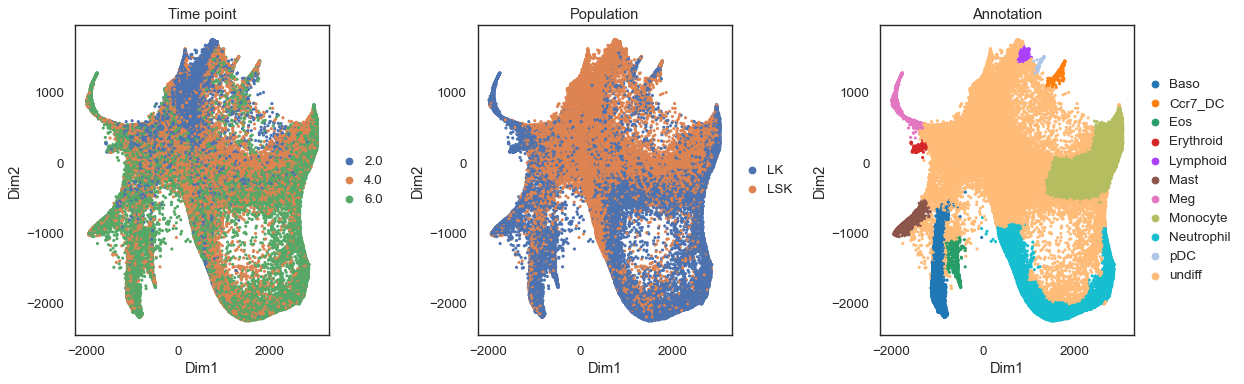

In [9]:
adata.obs['Time point'] = adata.obs['Time point'].astype(str)
me.pl.scatter(adata, 
              color=['Time point','Population','Annotation'],
              drawing_order='random',
              obsm='X_SPRING')

In [10]:
st = time.time()
me.tl.clone_distance(adata,
                     method='geodesic',
                     obsm='X_SPRING',
                     anno_time='Time point',
                     n_jobs=20)
ed = time.time()

Finished: 33.11950604518255 mins


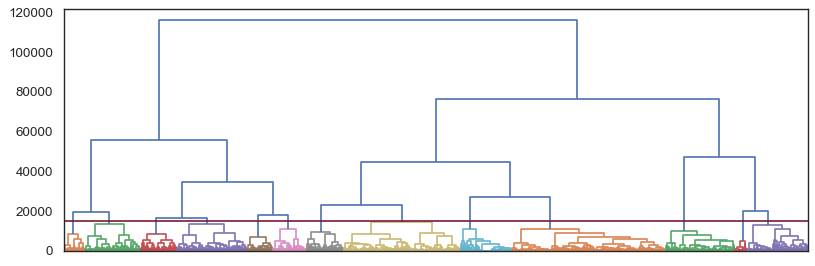

In [11]:
me.pl.clone_dendrogram(adata, color_threshold=15000)

In [12]:
me.tl.cluster_clones(adata,
                     n_clusters=12,
                     method='hierarchical')

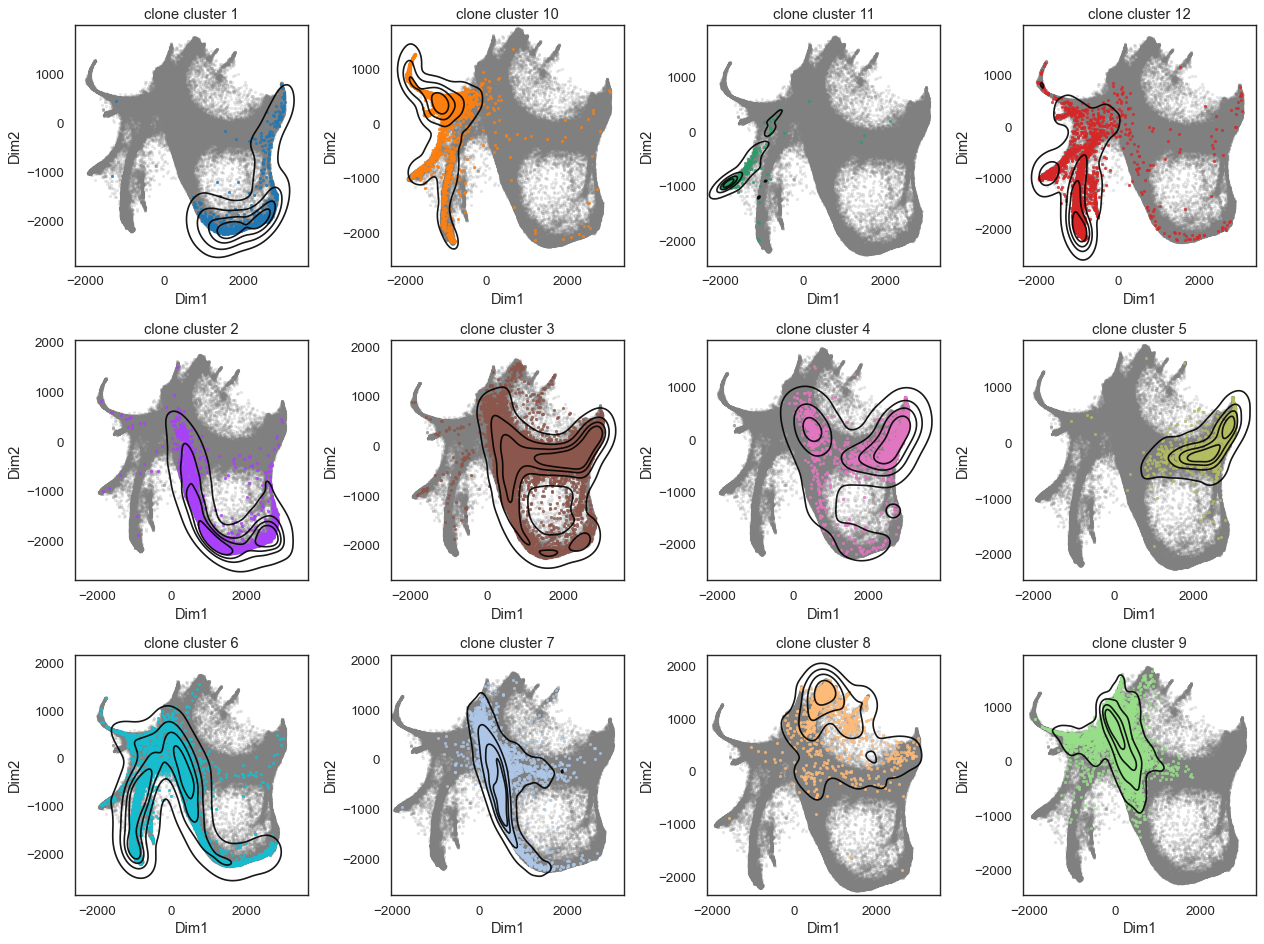

In [13]:
me.pl.clone_clusters(adata, group='hierarchical', obsm='X_SPRING',show_contour=True, 
                     levels=5, fig_ncol=4)

In [14]:
adata.uns['clone']['anno']

,hierarchical
0,9
1,1
2,2
3,9
4,12
...,...
5859,10
5860,12
5861,10
5862,4


In [15]:
adata.uns['clone']['anno'][adata.uns['clone']['anno']['hierarchical'] == '3']

,hierarchical
21,3
23,3
38,3
45,3
49,3
...,...
5806,3
5821,3
5828,3
5831,3


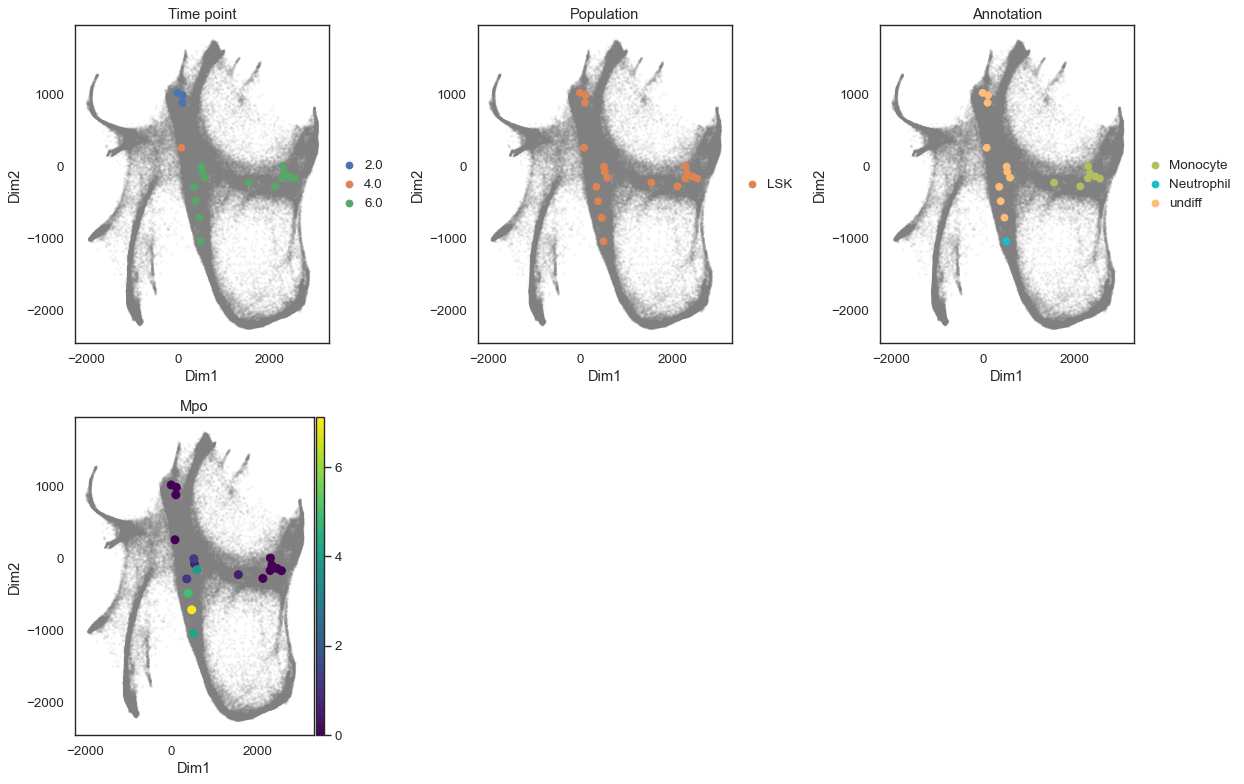

In [23]:
me.pl.clones(adata, 
             ids=['38'], 
             obsm='X_SPRING', 
             color=['Time point','Population','Annotation', 'Mpo'],
             bg_alpha=0.1,
             show_contour=False)

In [17]:
adata.write('./result_larry/adata_larry.h5ad')